In [22]:
#importing modules
import pandas as pd
import numpy as np

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
#importing data
ad_data = pd.read_csv('advertising.csv')

In [25]:
#analysing data
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [26]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


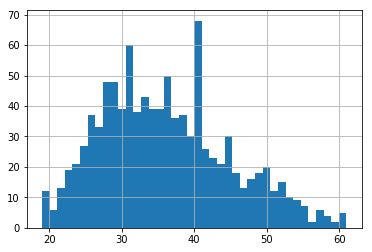

In [27]:
#histogram of age 
ad_data['Age'].hist(bins = 40)

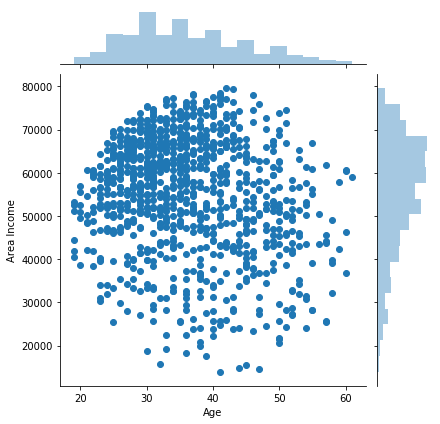

In [28]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)

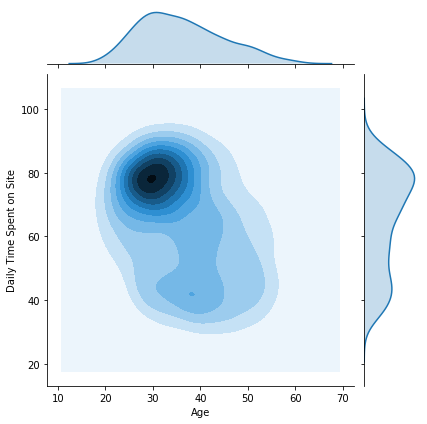

In [29]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,kind='kde')

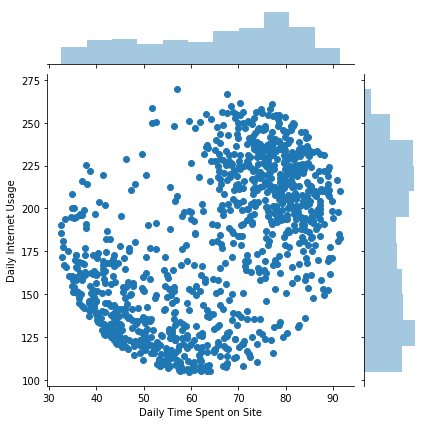

In [30]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data)

In [32]:
from sklearn.model_selection import train_test_split

In [38]:
X = ad_data[['Age','Area Income','Daily Time Spent on Site']]
y = ad_data['Clicked on Ad']

In [39]:
X.head()

,Age,Area Income,Daily Time Spent on Site
0,35,61833.90,68.95
1,31,68441.85,80.23
2,26,59785.94,69.47
3,29,54806.18,74.15
4,35,73889.99,68.37


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logiReg = LogisticRegression()

In [43]:
logiReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
predicted = logiReg.predict(X_test)

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,predicted))

             precision    recall  f1-score   support

          0       0.84      0.97      0.90       162
          1       0.97      0.82      0.89       168

avg / total       0.90      0.89      0.89       330



In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
print(confusion_matrix(y_test,predicted))

[[157   5]
 [ 30 138]]


In [60]:
print('accuracy is %.2f' % ((157+138)/(157+138+5+30)))

accuracy is 0.89
